# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

Pada submission ini saya menggunakan dataset **House Prices – Advanced Regression Techniques** (Kaggle).

## Sumber Dataset
- Sumber: Kaggle
- Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques 

## Tujuan
Tujuan dari proyek ini adalah membangun model **regresi** untuk memprediksi harga rumah (**SalePrice**) berdasarkan fitur-fitur properti.

## Deskripsi Data
Dataset berisi informasi properti rumah seperti luas tanah, kualitas bangunan, tahun dibuat, jumlah kamar, tipe lingkungan, dan fitur lainnya.  
Secara umum dataset terdiri dari:
- Data train (memiliki label/target `SalePrice`)
- Data test (tanpa label, digunakan untuk evaluasi/prediksi)

## Contoh Fitur
Beberapa fitur penting pada dataset:
- Numerik: `LotArea`, `OverallQual`, `YearBuilt`, `GrLivArea`, `GarageCars`, `TotalBsmtSF`
- Kategorikal: `Neighborhood`, `MSZoning`, `HouseStyle`, `SaleCondition`

## Catatan Kondisi Data
Dataset memiliki nilai kosong (missing values) pada beberapa kolom dan memiliki fitur kategorikal sehingga perlu dilakukan preprocessing seperti:
- handling missing values
- encoding fitur kategorikal (misalnya one-hot encoding)
- pemisahan data train/valid untuk evaluasi



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

import joblib

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

RANDOM_STATE = 42

RAW_DIR = Path("house_prices_raw")
OUT_DIR = Path("house_prices_preprocessing")
RAW_DIR.mkdir(parents=True, exist_ok=True)
OUT_DIR.mkdir(parents=True, exist_ok=True)

COMPETITION = "house-prices-advanced-regression-techniques"
TARGET_COLUMN = "SalePrice"

print("RAW_DIR:", RAW_DIR.resolve())
print("OUT_DIR:", OUT_DIR.resolve())

RAW_DIR: /content/house_prices_raw
OUT_DIR: /content/house_prices_preprocessing


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:

!pip -q install kaggle

from pathlib import Path

RAW_DIR = Path("house_prices_raw")
RAW_DIR.mkdir(parents=True, exist_ok=True)

COMPETITION = "house-prices-advanced-regression-techniques"

# 2) Siapkan kredensial Kaggle

# from google.colab import files
# files.upload()

if not Path("kaggle.json").exists():
    print("⚠️ File kaggle.json belum ditemukan.")
    print("Silakan upload kaggle.json (Colab: files.upload()) atau letakkan di folder kerja.")
else:
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/kaggle.json
    !chmod 600 ~/.kaggle/kaggle.json
    print("✅ kaggle.json configured")

!kaggle competitions download -c {COMPETITION} -p {RAW_DIR.as_posix()} --force

# 4) Extract
zips = sorted(RAW_DIR.glob("*.zip"), key=lambda p: p.stat().st_mtime, reverse=True)
if len(zips) == 0:
    raise FileNotFoundError("Zip tidak ditemukan. Pastikan sudah join competition dan token valid.")

latest_zip = zips[0]
print("✅ Zip:", latest_zip.name)

!unzip -o {latest_zip.as_posix()} -d {RAW_DIR.as_posix()}

print("\n✅ Files in house_prices_raw/:")
for p in RAW_DIR.iterdir():
    print("-", p.name)


✅ kaggle.json configured
  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 580MB/s]
✅ Zip: house-prices-advanced-regression-techniques.zip
Archive:  house_prices_raw/house-prices-advanced-regression-techniques.zip
  inflating: house_prices_raw/data_description.txt  
  inflating: house_prices_raw/sample_submission.csv  
  inflating: house_prices_raw/test.csv  
  inflating: house_prices_raw/train.csv  

✅ Files in house_prices_raw/:
- train.csv
- test.csv
- house-prices-advanced-regression-techniques.zip
- sample_submission.csv
- data_description.txt


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== Train Loaded ===
Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



=== Test Loaded ===
Shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal



=== Train Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81



=== Duplicate Rows (Train) ===
Duplicates: 0


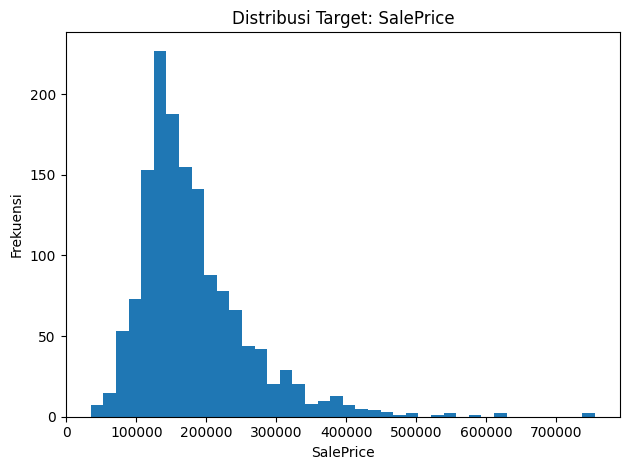

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


,feature,abs_corr
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581
5,1stFlrSF,0.605852
6,FullBath,0.560664
7,TotRmsAbvGrd,0.533723
8,YearBuilt,0.522897
9,YearRemodAdd,0.507101


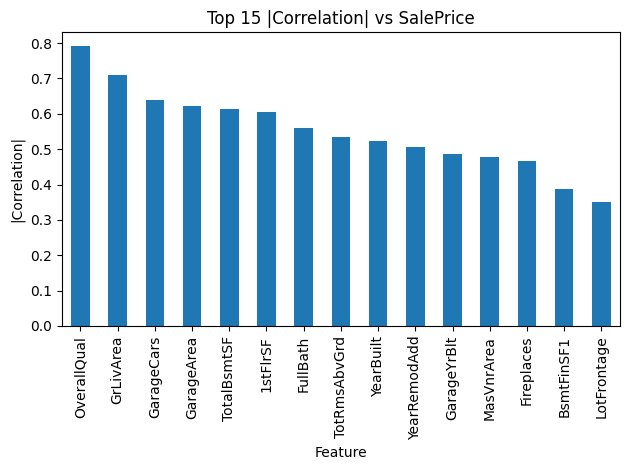

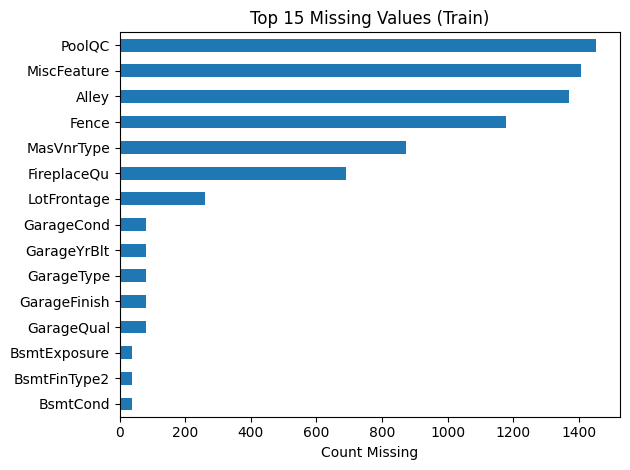

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

RAW_DIR = Path("house_prices_raw")

train_path = RAW_DIR / "train.csv"
test_path  = RAW_DIR / "test.csv"

if not train_path.exists() or not test_path.exists():
    raise FileNotFoundError("train.csv / test.csv tidak ditemukan di house_prices_raw/. Pastikan download & extract berhasil.")

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

print("=== Train Loaded ===")
print("Shape:", train_df.shape)
display(train_df.head())

print("\n=== Test Loaded ===")
print("Shape:", test_df.shape)
display(test_df.head())

print("\n=== Train Info ===")
train_df.info()

print("\n=== Missing Values (Train Top 20) ===")
na_train = train_df.isna().sum().sort_values(ascending=False)
display(na_train[na_train > 0].head(20))

print("\n=== Duplicate Rows (Train) ===")
print("Duplicates:", train_df.duplicated().sum())

# EDA singkat & relevan

TARGET_COLUMN = "SalePrice"

# Distribusi target
plt.figure()
train_df[TARGET_COLUMN].plot(kind="hist", bins=40)
plt.title("Distribusi Target: SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

display(train_df[TARGET_COLUMN].describe())

# Korelasi numerik top dengan target (Top 15)
num_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
num_cols_wo_target = [c for c in num_cols if c != TARGET_COLUMN]

corr = train_df[num_cols_wo_target + [TARGET_COLUMN]].corr(numeric_only=True)[TARGET_COLUMN].drop(TARGET_COLUMN)
corr_top = corr.abs().sort_values(ascending=False).head(15)

display(pd.DataFrame({"feature": corr_top.index, "abs_corr": corr_top.values}))

plt.figure()
corr_top.plot(kind="bar")
plt.title("Top 15 |Correlation| vs SalePrice")
plt.xlabel("Feature")
plt.ylabel("|Correlation|")
plt.tight_layout()
plt.show()

# Missing values overview (Top 15)
na_top = na_train[na_train > 0].head(15)
if len(na_top) > 0:
    plt.figure()
    na_top.sort_values().plot(kind="barh")
    plt.title("Top 15 Missing Values (Train)")
    plt.xlabel("Count Missing")
    plt.tight_layout()
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
# 5. Data Preprocessing + Save Output

import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import joblib

RANDOM_STATE = 42

RAW_DIR = Path("house_prices_raw")
OUT_DIR = Path("house_prices_preprocessing")
OUT_DIR.mkdir(parents=True, exist_ok=True)

train_df = pd.read_csv(RAW_DIR / "train.csv")
test_df  = pd.read_csv(RAW_DIR / "test.csv")

TARGET_COLUMN = "SalePrice"

train_df = train_df.drop_duplicates()

y = train_df[TARGET_COLUMN]
X = train_df.drop(columns=[TARGET_COLUMN])

if "Id" in X.columns:
    X = X.drop(columns=["Id"])
if "Id" in test_df.columns:
    test_features = test_df.drop(columns=["Id"])
else:
    test_features = test_df.copy()

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

print("Numerical columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ],
    remainder="drop"
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

X_train_p = preprocessor.fit_transform(X_train)
X_valid_p = preprocessor.transform(X_valid)
X_test_p  = preprocessor.transform(test_features)

feature_names = []
feature_names.extend(num_cols)
if len(cat_cols) > 0:
    ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
    feature_names.extend(ohe.get_feature_names_out(cat_cols).tolist())

X_train_p = pd.DataFrame(X_train_p, columns=feature_names)
X_valid_p = pd.DataFrame(X_valid_p, columns=feature_names)
X_test_p  = pd.DataFrame(X_test_p, columns=feature_names)

X_train_path = OUT_DIR / "X_train_processed.csv"
X_valid_path = OUT_DIR / "X_valid_processed.csv"
X_test_path  = OUT_DIR / "X_test_processed.csv"
y_train_path = OUT_DIR / "y_train.csv"
y_valid_path = OUT_DIR / "y_valid.csv"

X_train_p.to_csv(X_train_path, index=False)
X_valid_p.to_csv(X_valid_path, index=False)
X_test_p.to_csv(X_test_path, index=False)

y_train.to_csv(y_train_path, index=False, header=True)
y_valid.to_csv(y_valid_path, index=False, header=True)

joblib.dump(preprocessor, OUT_DIR / "preprocessor.joblib")

print("\n✅ Saved Preprocessed Files:")
print("-", X_train_path.resolve())
print("-", X_valid_path.resolve())
print("-", X_test_path.resolve())
print("-", y_train_path.resolve())
print("-", y_valid_path.resolve())
print("-", (OUT_DIR / "preprocessor.joblib").resolve())

print("\n=== Final Shapes ===")
print("X_train_processed:", X_train_p.shape)
print("X_valid_processed:", X_valid_p.shape)
print("X_test_processed :", X_test_p.shape)

display(X_train_p.head())


Numerical columns: 36
Categorical columns: 43

✅ Saved Preprocessed Files:
- /content/house_prices_preprocessing/X_train_processed.csv
- /content/house_prices_preprocessing/X_valid_processed.csv
- /content/house_prices_preprocessing/X_test_processed.csv
- /content/house_prices_preprocessing/y_train.csv
- /content/house_prices_preprocessing/y_valid.csv
- /content/house_prices_preprocessing/preprocessor.joblib

=== Final Shapes ===
X_train_processed: (1168, 285)
X_valid_processed: (292, 285)
X_test_processed : (1459, 285)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,...,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.866764,-0.012468,-0.212896,-0.820445,0.372217,-0.455469,-1.346063,-0.597889,1.037269,-0.285504,-0.400282,0.572612,0.374235,-0.801923,-0.118999,-0.407093,1.105320,-0.24287,-1.055566,-0.764098,0.136218,-0.212757,-0.964566,-0.958592,-0.904403,-1.056544,-0.863837,1.188402,-0.714352,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.133417,1.650065,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,


# **6. Hyperparameter Tuning**

In [8]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X_train = pd.read_csv("house_prices_preprocessing/X_train_processed.csv")
y_train = pd.read_csv("house_prices_preprocessing/y_train.csv").values.ravel()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best Score (RMSE):", -grid_search.best_score_)

best_model = grid_search.best_estimator_

joblib.dump(best_model, "model_tuned.joblib")


Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Score (RMSE): 29473.71654503954


['model_tuned.joblib']